In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load the dataset
titanic = pd.read_csv('pax.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Data Exploration
#plt.figure(figsize=(14, 10))


Text(0.5, 1.0, 'Survival Count')

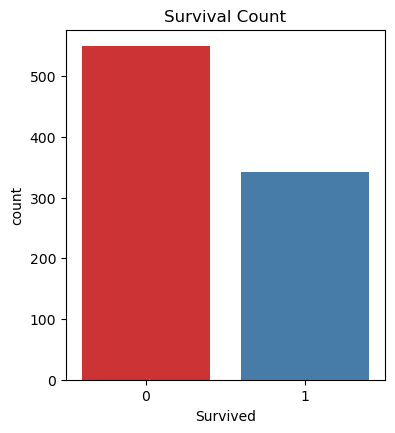

In [5]:
# Count of passengers who survived vs. didn't survive
plt.figure(figsize=(14, 10))
plt.subplot(2, 3, 1)
sns.countplot(x='Survived', data=titanic, palette='Set1')
plt.title('Survival Count')


Text(0.5, 1.0, 'Survival by Sex')

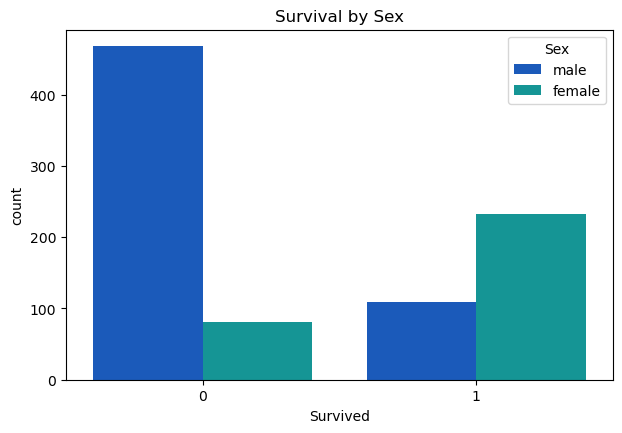

In [6]:
# Count of survivors by sex
plt.figure(figsize=(24, 10))
plt.subplot(2, 3, 2)
sns.countplot(x='Survived', hue='Sex', data=titanic, palette='winter')
plt.title('Survival by Sex')


Text(0.5, 1.0, "Survival by Person's class")

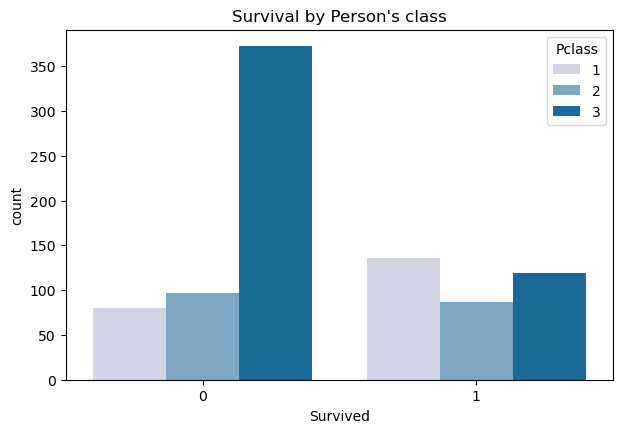

In [7]:
# Count of survivors by class
plt.figure(figsize=(24, 10))
plt.subplot(2, 3, 3)
sns.countplot(x='Survived', hue='Pclass', data=titanic, palette='PuBu')
plt.title('''Survival by Person's class''')

Text(0.5, 1.0, 'Age Distribution')

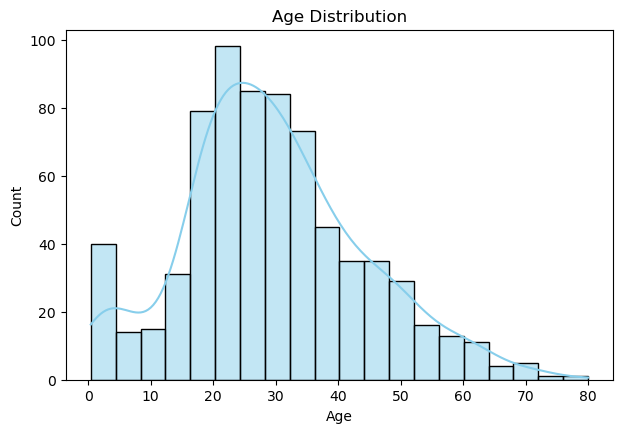

In [8]:
plt.figure(figsize=(24, 10))
# Age distribution of passengers
plt.subplot(2, 3, 4)
sns.histplot(data=titanic, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Fare Distribution')

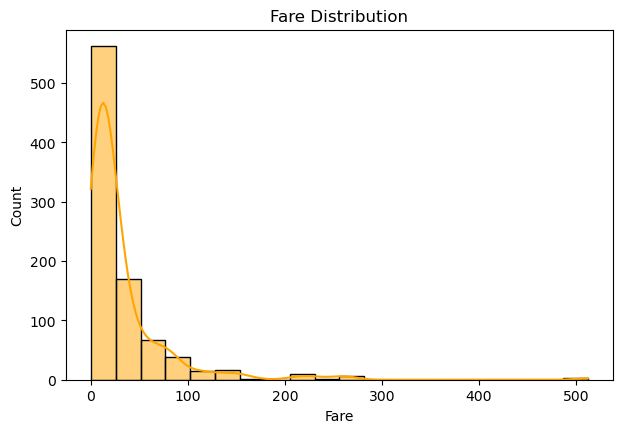

In [9]:
plt.figure(figsize=(24, 10))
# Fare distribution of passengers
plt.subplot(2, 3, 5)
sns.histplot(data=titanic, x='Fare', bins=20, kde=True, color='orange')
plt.title('Fare Distribution')

Text(0.5, 1.0, 'Siblings/Spouses Count')

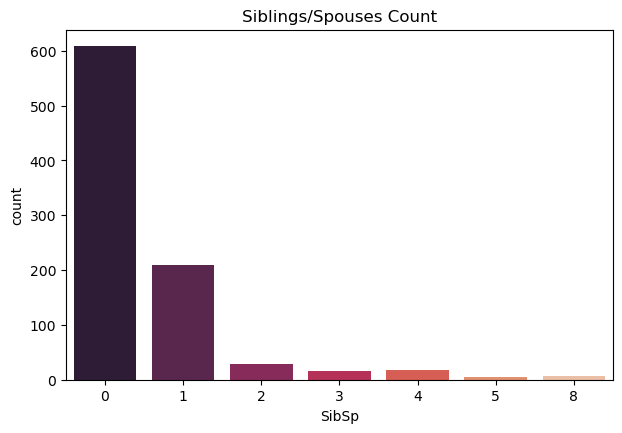

In [10]:
plt.figure(figsize=(24, 10))
# Siblings/Spouses distribution
plt.subplot(2, 3, 6)
sns.countplot(x='SibSp', data=titanic, palette='rocket')
plt.title('Siblings/Spouses Count')

#plt.tight_layout()
#plt.show()


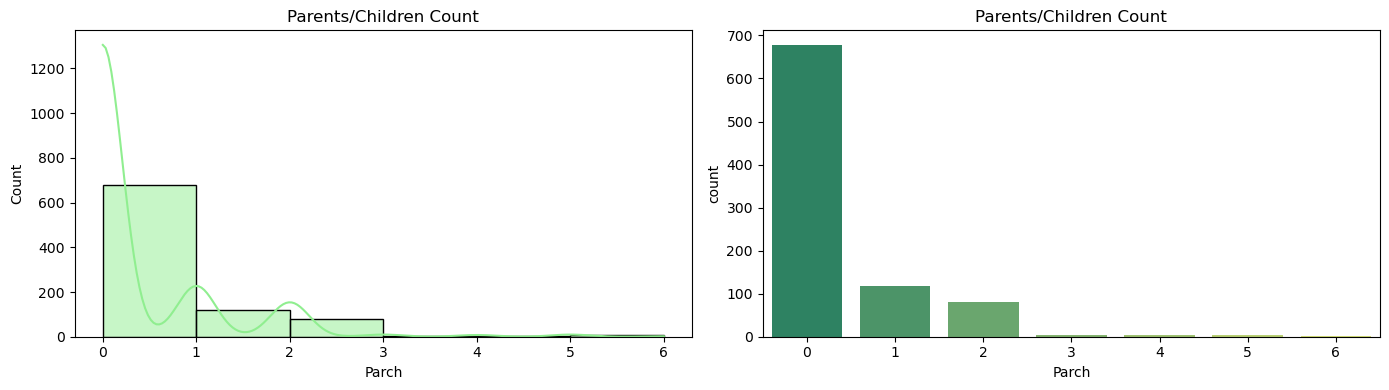

In [11]:
# Parents/Children distribution
plt.figure(figsize=(14, 4))

# Parents/Children histogram
plt.subplot(1, 2, 1)
sns.histplot(data=titanic, x='Parch', bins=6, kde=True, color='lightgreen')
plt.title('Parents/Children Count')

# Parents/Children count plot
plt.subplot(1, 2, 2)
sns.countplot(x='Parch', data=titanic, palette='summer')
plt.title('Parents/Children Count')

plt.tight_layout()
plt.show()

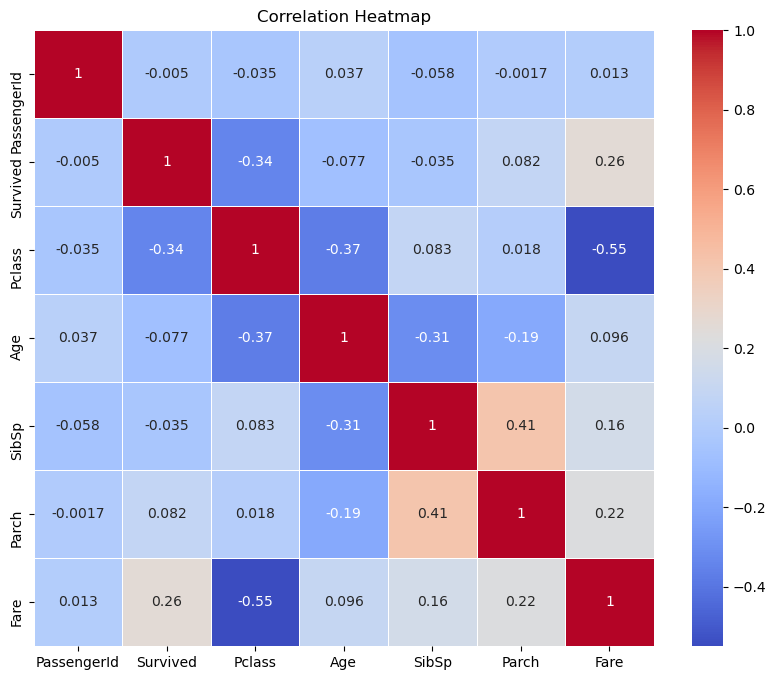

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = titanic.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Data Preprocessing
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)


In [14]:
# Handle Categorical Columns (Sex)
titanic = pd.get_dummies(titanic, columns=['Sex'], drop_first=True)



In [15]:
# Handle Missing Values (Age)
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)



In [16]:
# Train-Test Split
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)



In [17]:
# Logistic Regression
lm = LogisticRegression()
lm.fit(X_train, y_train)
prediction = lm.predict(X_test)


In [18]:

# Evaluation
conf_matrix = confusion_matrix(y_test, prediction)
class_rep = classification_report(y_test, prediction)
accuracy = accuracy_score(y_test, prediction)


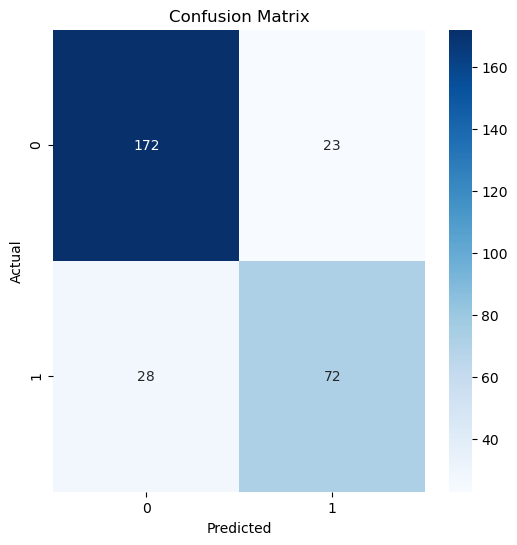

In [19]:

# Visualize Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [20]:

# Print the results
print("Classification Report:\n", class_rep)
print("Accuracy:", accuracy)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       195
           1       0.76      0.72      0.74       100

    accuracy                           0.83       295
   macro avg       0.81      0.80      0.80       295
weighted avg       0.83      0.83      0.83       295

Accuracy: 0.8271186440677966
